In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
import wandb

In [52]:
wandb.login()

True

In [53]:
api = wandb.Api()
sweep_ids = ["1qcd2x0p", "dwqldmag", "s3jg6oju", "cw2quf1k", "68wrws1j"]
sweeps = [api.sweep(f"eraldoluis/WeightedCRF/{sweep_id}") for sweep_id in sweep_ids]

In [54]:
runs = [run for sweep in sweeps for run in sweep.runs]
# run = next(runs)
# next(run.scan_history(keys=["model.label_weights.O", "validation/macro-fscore"]))
len(runs)

435

In [55]:
import pandas as pd 
# import wandb
# api = wandb.Api()

# # Project is specified by <entity/project-name>
# runs = api.runs("eraldoluis/WeightedCRF")

tags = ["O", "PER", "LOC", "ORG", "MISC"]

# columns to select
cols = ["name", "model.label_weights"]
cols += [f"validation/macro-{m}" for m in ["fscore", "precision", "recall"]]
cols += [f"validation/{tag}-{m}" for tag in tags for m in ["fscore", "precision", "recall"]]

values = []
for run in runs: 
    # .name is the human-readable name of the run.
    val = {"name": run.name}

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    # val.update({
    #     k: v for k, v in run.config.items() 
    #         if not k.startswith('_') and "label_weights" in k})
    val.update({k: v for k, v in run.config.items() if k in cols})

    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    val.update({k: v for k, v in run.summary._json_dict.items() if k in cols})

    values.append(val)

runs_df = pd.DataFrame(values, columns=cols)

In [56]:
runs_df.head(5)

,name,model.label_weights,validation/macro-fscore,validation/macro-precision,validation/macro-recall,validation/O-fscore,validation/O-precision,validation/O-recall,validation/PER-fscore,validation/PER-precision,validation/PER-recall,validation/LOC-fscore,validation/LOC-precision,validation/LOC-recall,validation/ORG-fscore,validation/ORG-precision,validation/ORG-recall,validation/MISC-fscore,validation/MISC-precision,validation/MISC-recall
0,crimson-sweep-20,{'MISC': 1.2},0.869368,0.869571,0.870169,0.993459,0.994145,0.992773,0.914546,0.904880,0.924420,0.878170,0.915975,0.843362,0.761135,0.735832,0.788241,0.799528,0.797022,0.802050
1,wandering-sweep-19,{'MISC': 1.15},0.829785,0.845316,0.834931,0.993420,0.992852,0.993990,0.807836,0.979195,0.687520,0.862128,0.888101,0.837631,0.683986,0.575342,0.843212,0.801556,0.791091,0.812303
2,hearty-sweep-18,{'MISC': 1.1},0.869199,0.881648,0.863239,0.991167,0.986449,0.995931,0.890830,0.945455,0.842172,0.893453,0.904157,0.882999,0.824349,0.895238,0.763862,0.746195,0.676943,0.831230
3,glowing-sweep-17,{'MISC': 1.05},0.845236,0.879502,0.838979,0.994335,0.993302,0.995369,0.839413,0.960704,0.745316,0.729086,0.594399,0.942693,0.806824,0.894645,0.734704,0.856522,0.954457,0.776814
4,stellar-sweep-16,{'LOC': 1.2},0.861782,0.873831,0.857162,0.993303,0.992850,0.993756,0.883798,0.918780,0.851381,0.869508,0.798323,0.954632,0.736193,0.730136,0.742352,0.826106,0.929064,0.743691


In [57]:
base_dict = {k: 1.0 for k in tags}
def transf(w):
    new_d = dict(base_dict)
    new_d.update(w)
    new_d = {f"label_weight_{k}": v for k, v in new_d.items()}
    return pd.Series(new_d)

df_runs_weights = pd.concat([runs_df, runs_df["model.label_weights"].apply(transf)], axis=1)

In [58]:
df_runs_weights.sample(5)

,name,model.label_weights,validation/macro-fscore,validation/macro-precision,validation/macro-recall,validation/O-fscore,validation/O-precision,validation/O-recall,validation/PER-fscore,validation/PER-precision,...,validation/ORG-precision,validation/ORG-recall,validation/MISC-fscore,validation/MISC-precision,validation/MISC-recall,label_weight_O,label_weight_PER,label_weight_LOC,label_weight_ORG,label_weight_MISC
186,lucky-sweep-24,{'PER': 0.95},0.840231,0.845756,0.848242,0.993311,0.991610,0.995019,0.842387,0.963220,...,0.672953,0.801625,0.741480,0.657911,0.849369,1.00,0.95,1.0,1.00,1.0
17,blooming-sweep-3,{'O': 0.85},0.820754,0.833982,0.821889,0.993290,0.991289,0.995299,0.857234,0.863168,...,0.854363,0.650574,0.627515,0.533076,0.762618,0.85,1.00,1.0,1.00,1.0
97,firm-sweep-12,{'O': 0.9},0.840184,0.869376,0.822993,0.993223,0.990807,0.995650,0.861791,0.788254,...,0.869537,0.646749,0.714041,0.780899,0.657729,0.90,1.00,1.0,1.00,1.0
198,denim-sweep-12,{'O': 1.15},0.673954,0.755002,0.664651,0.991192,0.984966,0.997498,0.719919,0.991091,...,0.673482,0.535373,0.448365,0.655539,0.340694,1.15,1.00,1.0,1.00,1.0
61,fallen-sweep-48,{'ORG': 1.15},0.834529,0.865510,0.825133,0.993878,0.992996,0.994761,0.840532,0.881226,...,0.640472,0.907744,0.699673,0.857961,0.590694,1.00,1.00,1.0,1.15,1.0


In [59]:
sels = [df_runs_weights[f"label_weight_{tag}"] == 1.0 for tag in tags]
for i, s in enumerate(sels):
    print(f"{tags[i]}: {len(s) - s.sum()}")

O: 80
PER: 80
LOC: 80
ORG: 80
MISC: 80


In [60]:
import numpy as np
def get_sel(idx):
    sels_diff = [s for i, s in enumerate(sels) if i != idx]
    sels_diff_and = sels_diff[0]
    for s in sels_diff[1:]:
        sels_diff_and = (sels_diff_and & s)
    return df_runs_weights[sels_diff_and]

In [61]:
def plot_metrics(tag):
    value_cols = [
        "validation/macro-fscore", 
        f"validation/{tags[tag]}-fscore",
        f"validation/{tags[tag]}-precision",
        f"validation/{tags[tag]}-recall"
    ]
    df = get_sel(tag).melt(id_vars=[f"label_weight_{tags[tag]}"], value_vars=value_cols)
    sns.lineplot(data=df, x=f"label_weight_{tags[tag]}", y="value", hue="variable")

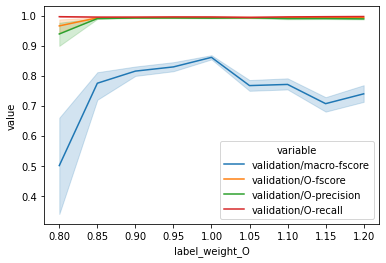

In [62]:
plot_metrics(0)

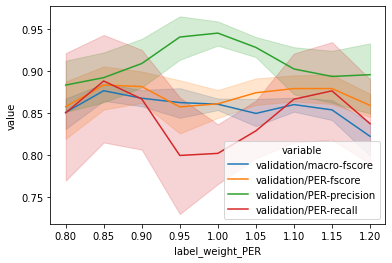

In [63]:
plot_metrics(1)

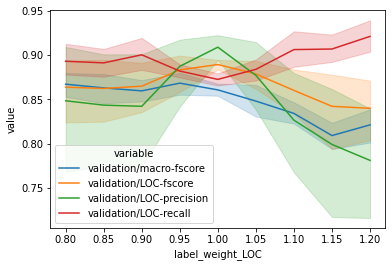

In [64]:
plot_metrics(2)

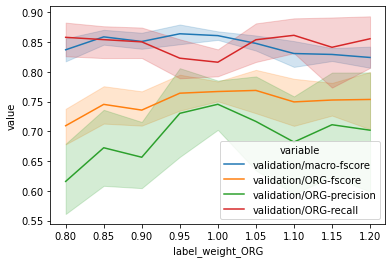

In [65]:
plot_metrics(3)

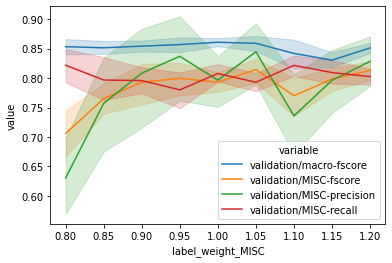

In [66]:
plot_metrics(4)